# Understanding Descriptive Statistics

Import the necessary libraries here:

In [183]:
# Libraries
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
## i took the liberty of abstracting the function for n rolls

def diceroll(n, s):
    #n is the number of rolls
    #s is the number of numbered sides of dices, we'll assume is an ordered dice
    sidevals = [i for i in range(1, s+1)]
    rolls = [random.choice(sidevals) for i in range(n)]
    ## i know the function is too explicit but hey...
    return pd.DataFrame(rolls, columns = ['roll_value']).set_index(np.arange(1, n+1)).rename_axis('roll_number')

In [3]:
nd = diceroll(11, 6)

#### 2.- Plot the results sorted by value.

In [56]:
# your code here
nd.sort_values(by = 'roll_value')

,roll_value
roll_number,
5,1
10,1
11,1
4,2
8,4
1,5
2,5
6,5
9,5


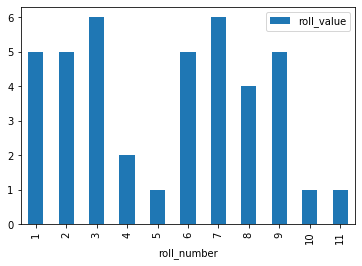

In [58]:
nd.plot.bar()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [5]:
# your code here
freqnd = nd.groupby(nd['roll_value']).agg({'roll_value' : 'first', 'roll_value': 'count'})
freqnd.columns =['roll_frequency']

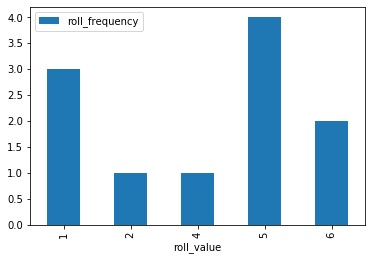

In [57]:
freqnd.plot.bar()

In [7]:
"""
your comments here

the second is a frequency distribution of the values of the first.
"""

'\nyour comments here\n\nthe second is a frequency distribution of the values of the first.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def dem_means(column_to_mean_over):
    return column_to_mean_over.sum()/column_to_mean_over.value_counts().sum()

dem_means(nd['roll_value'])

3.727272727272727

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
freqnd = nd.groupby(nd['roll_value']).agg({'roll_value' : 'first', 'roll_value': 'count'})
freqnd.columns =['roll_frequency']

def freq_means(values, frequency):
     return sum(values*frequency) / sum(frequency)

freq_means(freqnd.index, freqnd['roll_frequency'])

3.727272727272727

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [180]:
# your code here
def dem_medians(column_to_median_over):
    column_to_median_over = sorted(column_to_median_over)
    if len(column_to_median_over) % 2 == 0:
        m1 = column_to_median_over[len(column_to_median_over)//2]
        m2 = column_to_median_over[len(column_to_median_over)//2 - 1]
        return (m1+m2)/2
    else:
        return column_to_median_over[len(column_to_median_over)//2]

dem_medians(nd['roll_value'])

5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here

def dem_quartiles(column_to_quartile_over):
    column_to_quartile_over = sorted(column_to_quartile_over)
    if len(column_to_quartile_over) % 2 == 0:
        m1 = column_to_quartile_over[len(column_to_quartile_over)//2]
        m2 = column_to_quartile_over[len(column_to_quartile_over)//2 - 1]
        return (m1+m2)/2
    else:
        return [column_to_quartile_over[len(column_to_quartile_over)//2]
    median = dem_medians(column_to_quartile_over)
    
    
'''def dem_quartiles(column_to_quartile_over):
    column_to_quartile_over = sorted(column_to_quartile_over)
    if len(column_to_quartile_over) % 2 == 0:
        q1a = column_to_quartile_over[len(column_to_quartile_over)//4]
        q1b = column_to_quartile_over[len(column_to_quartile_over)//4 - 1]        
        ma = column_to_quartile_over[len(column_to_quartile_over)//2]
        mb = column_to_quartile_over[len(column_to_quartile_over)//2 - 1]
        q3a = column_to_quartile_over[-(len(column_to_quartile_over)//4)]
        q3b = column_to_quartile_over[-(len(column_to_quartile_over)//4 - 1)]
        return [(q1a+q2b)/2 ,(ma+mb)/2, ,column_to_quartile_over[-1]]
    else:
        return column_to_quartile_over[len(column_to_quartile_over)//2]
'''############this needs work

'def dem_quartiles(column_to_quartile_over):\n    column_to_quartile_over = sorted(column_to_quartile_over)\n    if len(column_to_quartile_over) % 2 == 0:\n        q1a = column_to_quartile_over[len(column_to_quartile_over)//4]\n        q1b = column_to_quartile_over[len(column_to_quartile_over)//4 - 1]        \n        ma = column_to_quartile_over[len(column_to_quartile_over)//2]\n        mb = column_to_quartile_over[len(column_to_quartile_over)//2 - 1]\n        q3a = column_to_quartile_over[-(len(column_to_quartile_over)//4)]\n        q3b = column_to_quartile_over[-(len(column_to_quartile_over)//4 - 1)]\n        return [(q1a+q2b)/2 ,(ma+mb)/2, ,column_to_quartile_over[-1]]\n    else:\n        return column_to_quartile_over[len(column_to_quartile_over)//2]\n'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

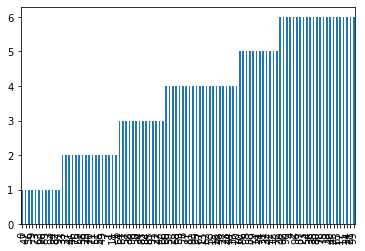

In [67]:
# your code here
path = '../data/roll_the_dice_hundred.csv'

roll_the_dice_100 = pd.read_csv(path, index_col = 0)
rtd100 = roll_the_dice_100.sort_values(by = 'value')
rtd100['value'].plot.bar()

In [13]:
"""
I see the results of 100 repetitions of an equiprobable discrete distribution from 1 to 6 being plotted in ascending order
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [68]:
# your code here
dem_means(rtd100['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [106]:
# your code here
freqrtd100 = rtd100.groupby(rtd100['value']).agg({'value' : 'first', 'value': 'count'})
freqrtd100

,value
value,
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [104]:
freqrtd100.columns =['frequency']

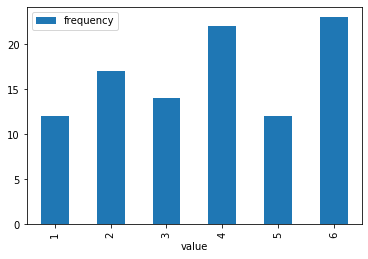

In [105]:
# your code here
freqrtd100.plot.bar()

In [17]:
"""
I see  the representations of the number of rolls with each value. the mean value will be the central point of the histogram on an equiprobable distribution of equidistant values.
mean will be the sum of the value on y axis multiplied by value on x axis, divided byt the sum of all values on y axis
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

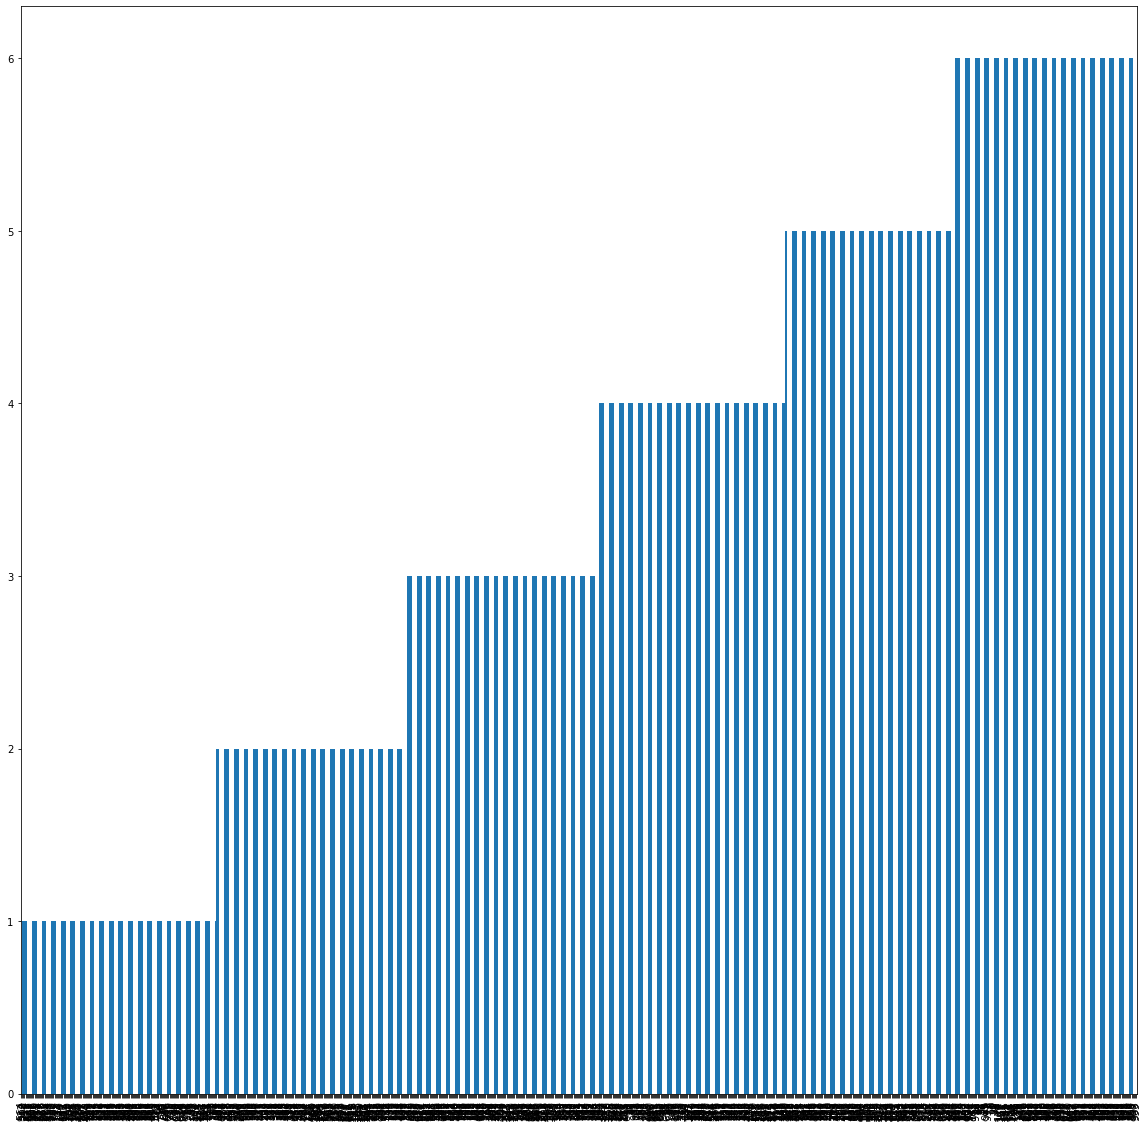

In [112]:
# your code here
path = '../data/roll_the_dice_thousand.csv'

roll_the_dice_1k = pd.read_csv(path, index_col = 0)
rtd1k = roll_the_dice_1k.sort_values(by = 'value')
rtd1k['value'].plot.bar(figsize  = (20,20))

In [111]:
rtd1k['value'].unique()

array([1, 2, 3, 4, 5, 6])

In [19]:
"""
it seems nothing has changed except the number of repetitions
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

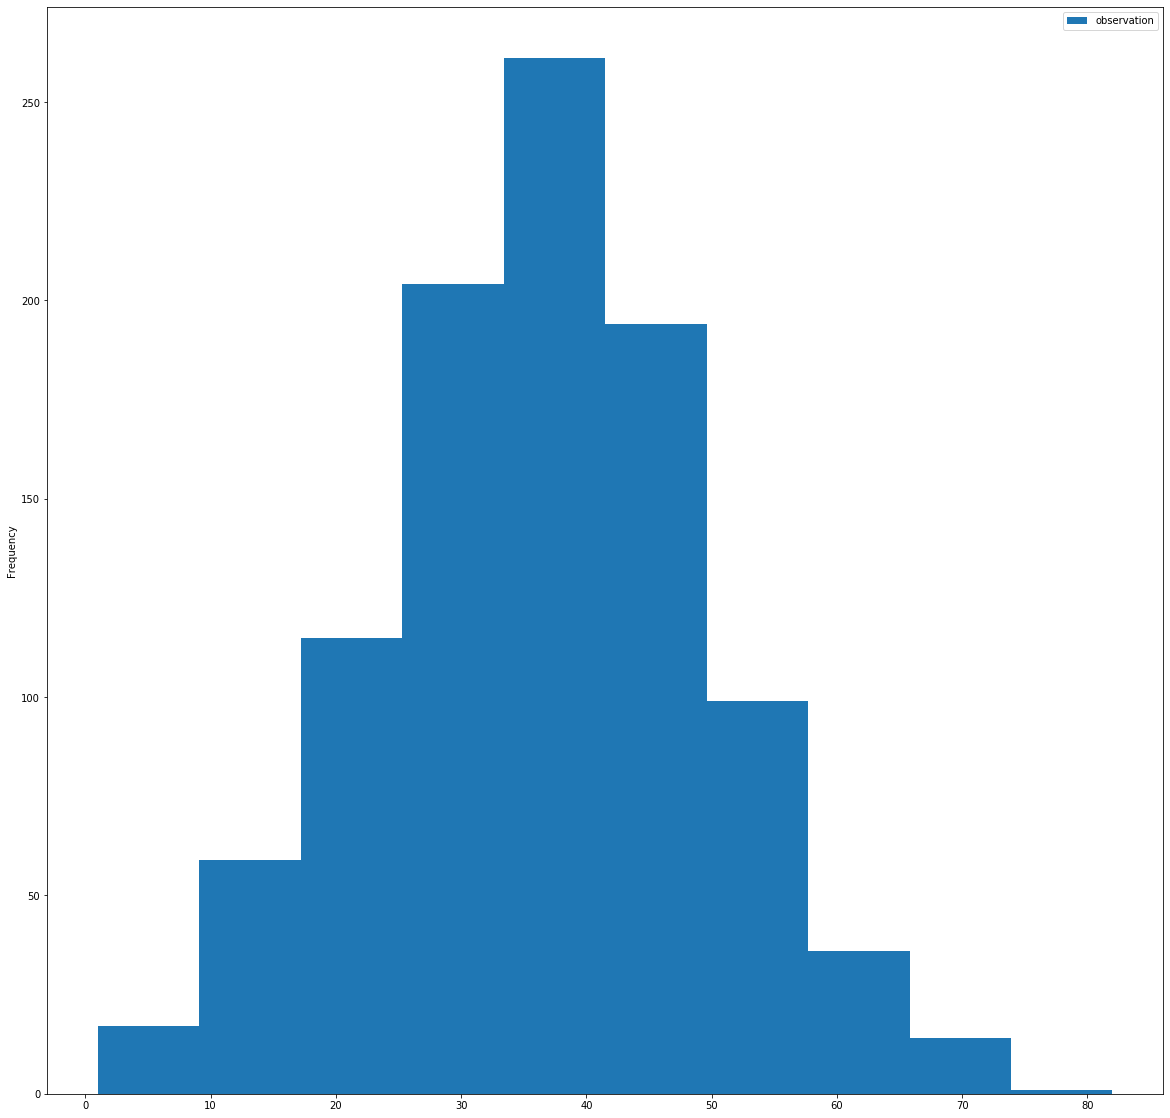

In [127]:
# your code here
path = '../data/ages_population.csv'

age = pd.read_csv(path)
age.sort_values(by = 'observation').plot.hist(figsize = (20,20))

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [124]:
# your code here
print(age['observation'].mean(), age['observation'].std())

36.56 12.816499625976762


In [125]:
"""
kind of. yes. Guessed 38 and 10
"""

'\nkind of. yes\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

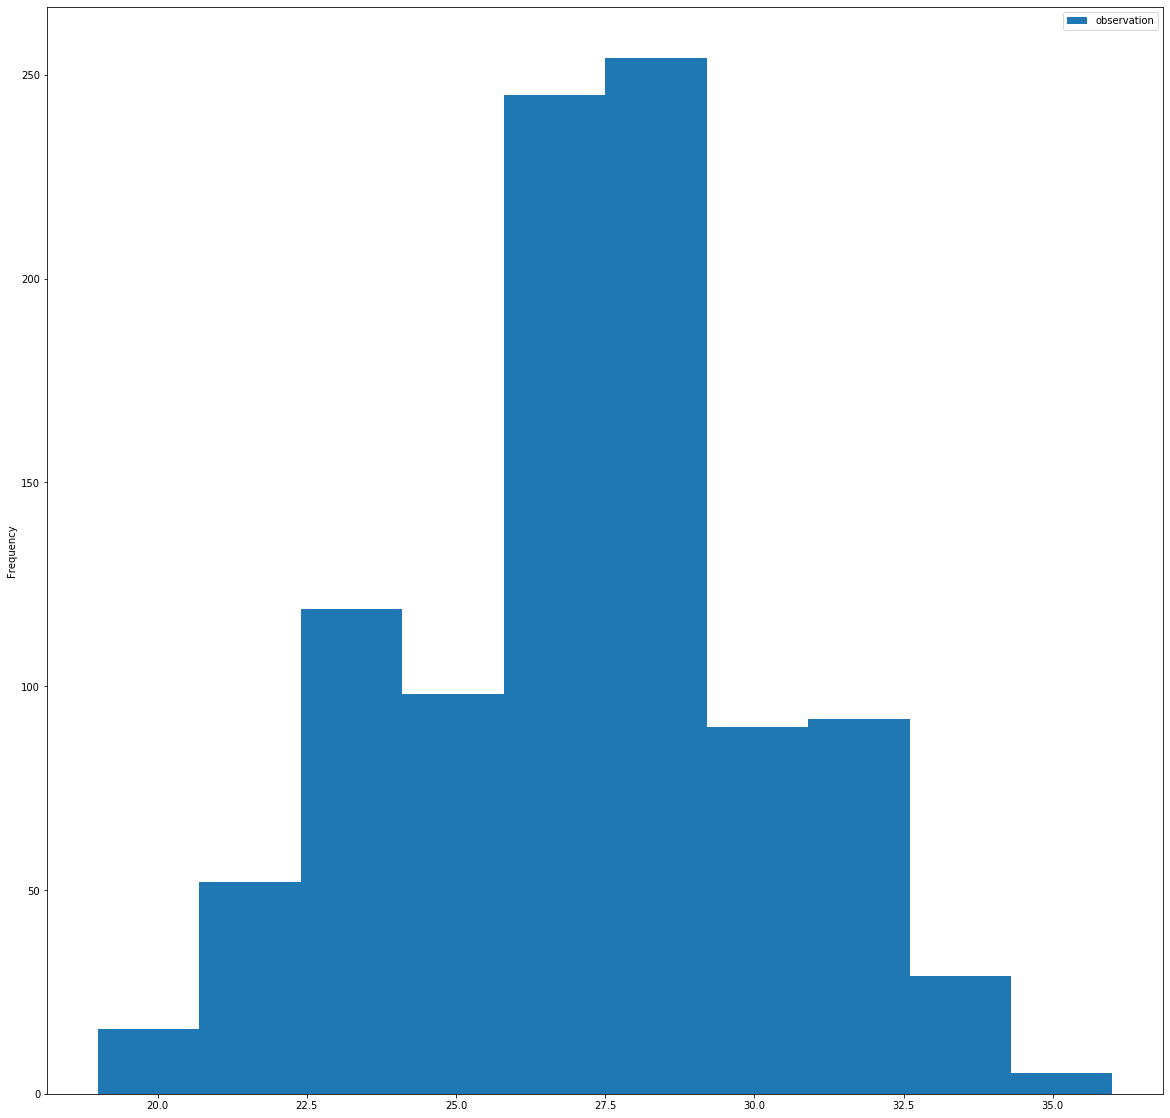

In [128]:
# your code here

# your code here
path = '../data/ages_population2.csv'

age = pd.read_csv(path)
age.sort_values(by = 'observation').plot.hist(figsize = (20,20))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [24]:
"""
Yes, the distribution has the same shape but the variance is diferent. there's less dispersion on the second case
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [129]:
# your code here
print(age['observation'].mean(), age['observation'].std())

27.155 2.969813932689186


In [26]:
"""
I think there's a different mean and less variance
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

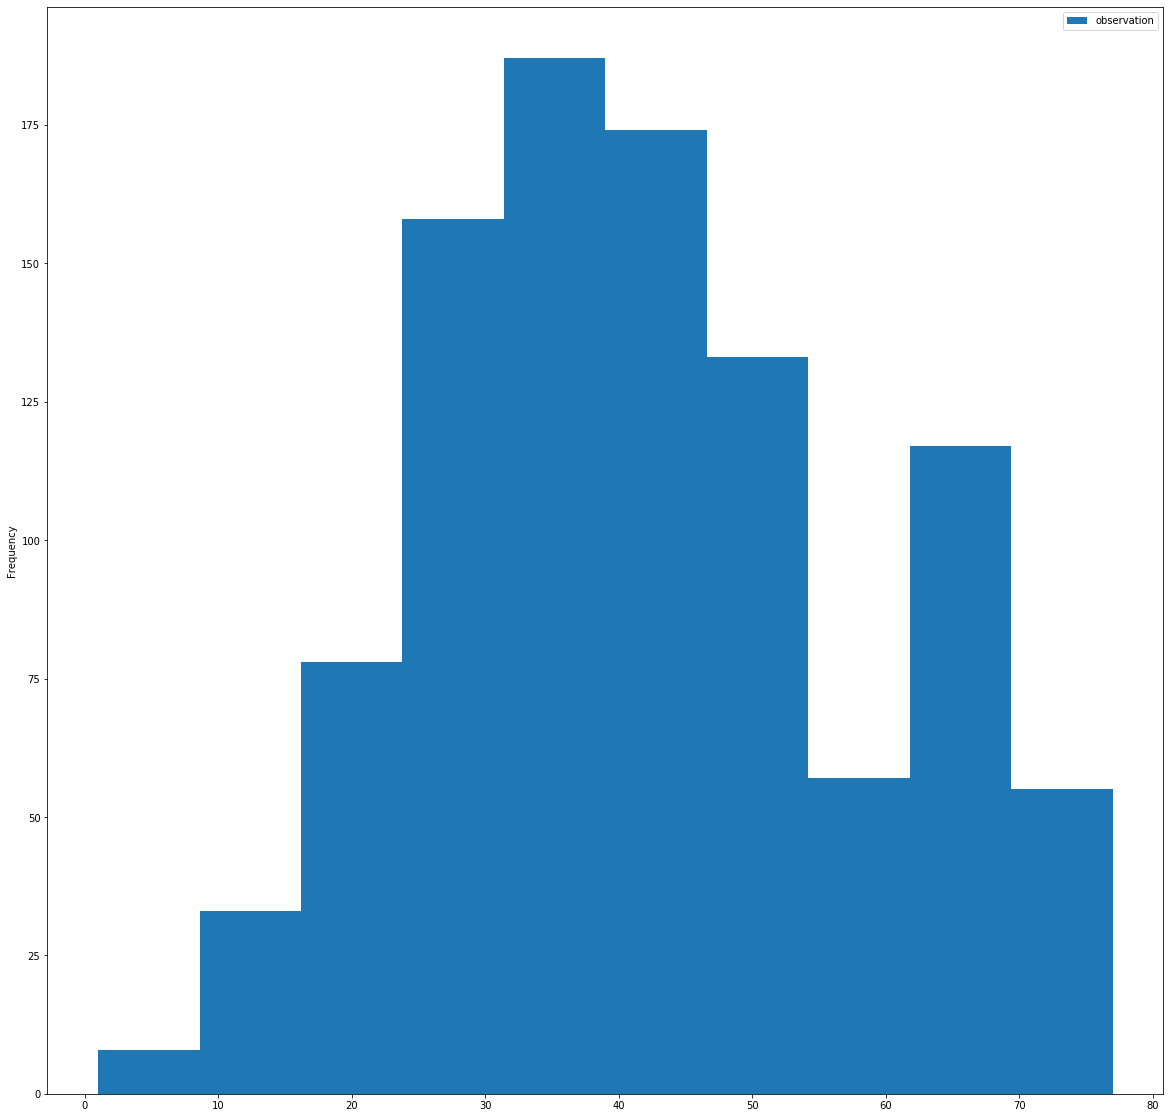

In [145]:
# your code here
path = '../data/ages_population3.csv'

age = pd.read_csv(path)
age.sort_values(by = 'observation').plot.hist(figsize = (20,20))

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [146]:
# your code here
print(age['observation'].mean(), age['observation'].std())

41.989 16.144705959865934


In [29]:
"""
this distribution is positively-skewed and has more variance
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [139]:
# your code here
age.quantile(q = [0, 0.25, 0.5, 0.75, 1])

,observation
0.00,1.0
0.25,30.0
0.50,40.0
0.75,53.0
1.00,77.0


In [31]:
"""
mean is greater than median. consistent with positively skewed distributions
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

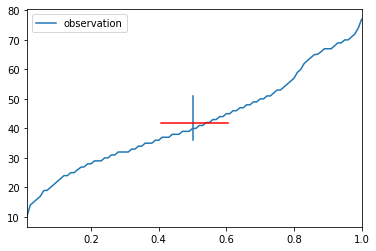

In [203]:
# your code here

age.quantile(q = [x/100 for x in range(1,101)])

ax = age.quantile(q = [x/100 for x in range(1,101)]).plot()
ax = ax.axvline(x = 0.5, ymin = 0.40, ymax = 0.6)
horiz_line_data = plt.axhline(y=age['observation'].mean(), color='r', linestyle='-', xmax= 0.6, xmin = 0.4)

In [33]:
"""
mean > median is how you define positive skewness, but here is a plot of percentile for good visualization"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [211]:
# your code here
path = '../data/'
nb1 = pd.read_csv(path+'ages_population.csv')
nb2 = pd.read_csv(path+'ages_population2.csv')
nb3 = pd.read_csv(path+'ages_population3.csv')

print('Neighborhood 1 overview', nb1.mean(), nb1.std(), nb1.quantile(q = [x/4 for x in range(0,5)]))
print('Neighborhood 2 overview', nb2.mean(), nb2.std(), nb2.quantile(q = [x/4 for x in range(0,5)]))
print('Neighborhood 3 overview', nb3.mean(), nb3.std(), nb3.quantile(q = [x/4 for x in range(0,5)]))

Neighborhood 1 overview observation    36.56
dtype: float64 observation    12.8165
dtype: float64       observation
0.00          1.0
0.25         28.0
0.50         37.0
0.75         45.0
1.00         82.0
Neighborhood 2 overview observation    27.155
dtype: float64 observation    2.969814
dtype: float64       observation
0.00         19.0
0.25         25.0
0.50         27.0
0.75         29.0
1.00         36.0
Neighborhood 3 overview observation    41.989
dtype: float64 observation    16.144706
dtype: float64       observation
0.00          1.0
0.25         30.0
0.50         40.0
0.75         53.0
1.00         77.0


In [35]:
"""
First 2 neighborhooods have no skewness in the distribution. 3rd does, positive skew.
1st and 3rd neighborhoods have similar means. 3rd has a little bit more variance. 2nd has less age variance.
minimum and max value on 2nd neghborhood seem to indicate it's a slice of total dataset or some weird place where there's no children or anyone older than 36
3rd neighborhood is the oldest by all measures and 2nd is the youngest.
"""

'\nyour comments here\n'